In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import main as m
import ipympl

## Get my Parkruns

In [2]:
df = m.get_parkrun_info(6486341)

In [3]:
df

,Event,Run Date,Run Number,Pos,Time,Age Grade,PB?
0,Belvoir Castle,14/01/2023,51,25,28:01,46.04%,NaN
1,Gedling,07/01/2023,327,71,27:27,46.99%,PB
2,Poole,31/12/2022,536,212,25:56,49.74%,NaN
3,Exmouth,24/12/2022,189,197,25:44,50.13%,PB
4,Rushcliffe,10/12/2022,464,103,25:59,49.65%,PB
5,Beeston,12/11/2022,370,107,26:05,49.46%,NaN
6,Finsbury Park,29/10/2022,565,254,27:37,46.71%,NaN
7,Colwick,22/10/2022,511,127,29:44,43.39%,NaN
8,Exmouth,08/10/2022,178,161,27:19,47.22%,NaN
9,Rushcliffe,27/08/2022,449,152,27:37,46.71%,PB


## Get UK events list

In [4]:
def get_parkrun_events_list():
    # This website shared a list of parkruns and their lat/longs
    # https://www.moreofless.co.uk/alphabetical-list-uk-parkrun-events-spreadsheet
    events = pd.read_csv('uk-parkruns.csv', header=None, names=['parkrun_name', 'location_name', 'longitude', 'latitude'])
    return events

In [5]:
events = get_parkrun_events_list()
events

,parkrun_name,location_name,longitude,latitude
0,Aberbeeg,Ebbw Valley Cycle Track,-3.144286,51.711165
1,Aberdare,Aberdare Park,-3.460089,51.718796
2,Aberdeen,Aberdeen Beach Esplanade,-2.086256,57.173898
3,Aberystwyth juniors,Plas Crug Park,-4.078402,52.412885
4,Aberystwyth,Plascrug Park,-4.080401,52.414546
...,...,...,...,...
983,Wythenshawe,"Wythenshawe Park, Wythenshawe",-2.288139,53.405502
984,Yatton Recreation juniors,Yatton Recreation Ground,-2.813883,51.387275
985,Yeovil Montacute,Montacute House,-2.712979,50.951485
986,Yeovil Rec juniors,Yeovil Rec,-2.638930,50.954606


## Join my runs to get lat/long

In [6]:
df = pd.merge(events, df, how='left', left_on='parkrun_name', right_on='Event').drop(columns=['Event'])
df

,parkrun_name,location_name,longitude,latitude,Run Date,Run Number,Pos,Time,Age Grade,PB?
0,Aberbeeg,Ebbw Valley Cycle Track,-3.144286,51.711165,NaN,NaN,NaN,NaN,NaN,NaN
1,Aberdare,Aberdare Park,-3.460089,51.718796,NaN,NaN,NaN,NaN,NaN,NaN
2,Aberdeen,Aberdeen Beach Esplanade,-2.086256,57.173898,NaN,NaN,NaN,NaN,NaN,NaN
3,Aberystwyth juniors,Plas Crug Park,-4.078402,52.412885,NaN,NaN,NaN,NaN,NaN,NaN
4,Aberystwyth,Plascrug Park,-4.080401,52.414546,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
988,Wythenshawe,"Wythenshawe Park, Wythenshawe",-2.288139,53.405502,NaN,NaN,NaN,NaN,NaN,NaN
989,Yatton Recreation juniors,Yatton Recreation Ground,-2.813883,51.387275,NaN,NaN,NaN,NaN,NaN,NaN
990,Yeovil Montacute,Montacute House,-2.712979,50.951485,NaN,NaN,NaN,NaN,NaN,NaN
991,Yeovil Rec juniors,Yeovil Rec,-2.638930,50.954606,NaN,NaN,NaN,NaN,NaN,NaN


## Setup the UK Map

Import the UK map (currently can't find out how to get Scotland + Ireland)

In [7]:
uk = gpd.read_file("uk.geojson")

Create a GDF from our parkrun df, so we can plot it on top of the UK

### My runs GDF

In [8]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(uk.crs)

### Button Press Event - This works

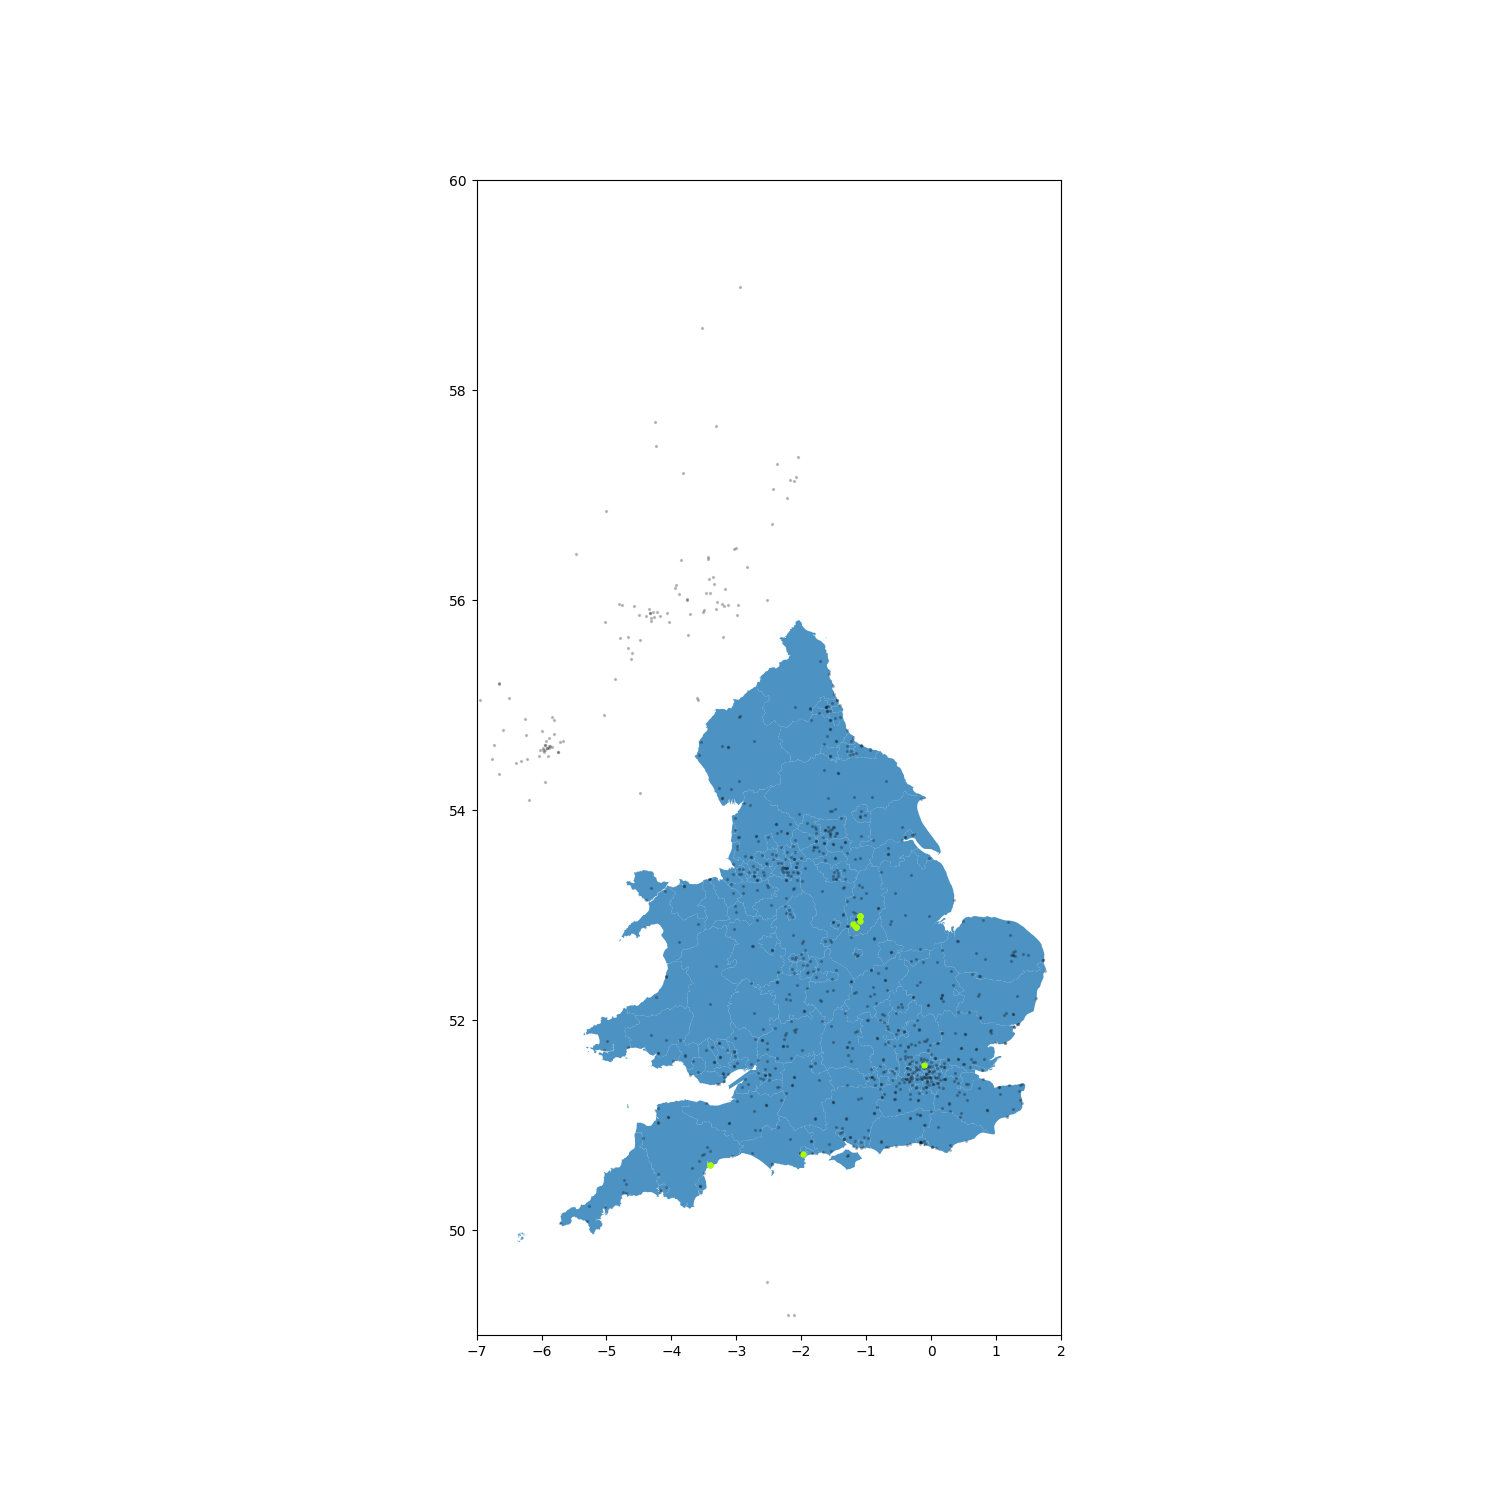

In [9]:
%matplotlib widget

import numpy as np

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
uk.plot(ax=ax, alpha=0.8)

def onclick(event):
    ax = plt.gca()
    # ax.set_title(f"You selected {event.x}, {event.y}")

    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    
    # x = gdf.iloc[event.ind[0]]['longitude']
    # y = gdf.iloc[event.ind[0]]['latitude']
    # parkrun = gdf.iloc[event.ind[0]]['parkrun_name']
    
    ax.set_title(f"{tx}")


gdf[gdf['Run Date'].isna()].plot(ax=ax, color='black', marker='.', markersize=8, alpha=0.2, picker=20)
gdf[gdf['Run Date'].notna()].plot(ax=ax, color='#AAFF00', marker='.', markersize=50, picker=20)

ax.set_xlim(-7,2)
ax.set_ylim(49,60)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

### Pick Event - Doesn't work?

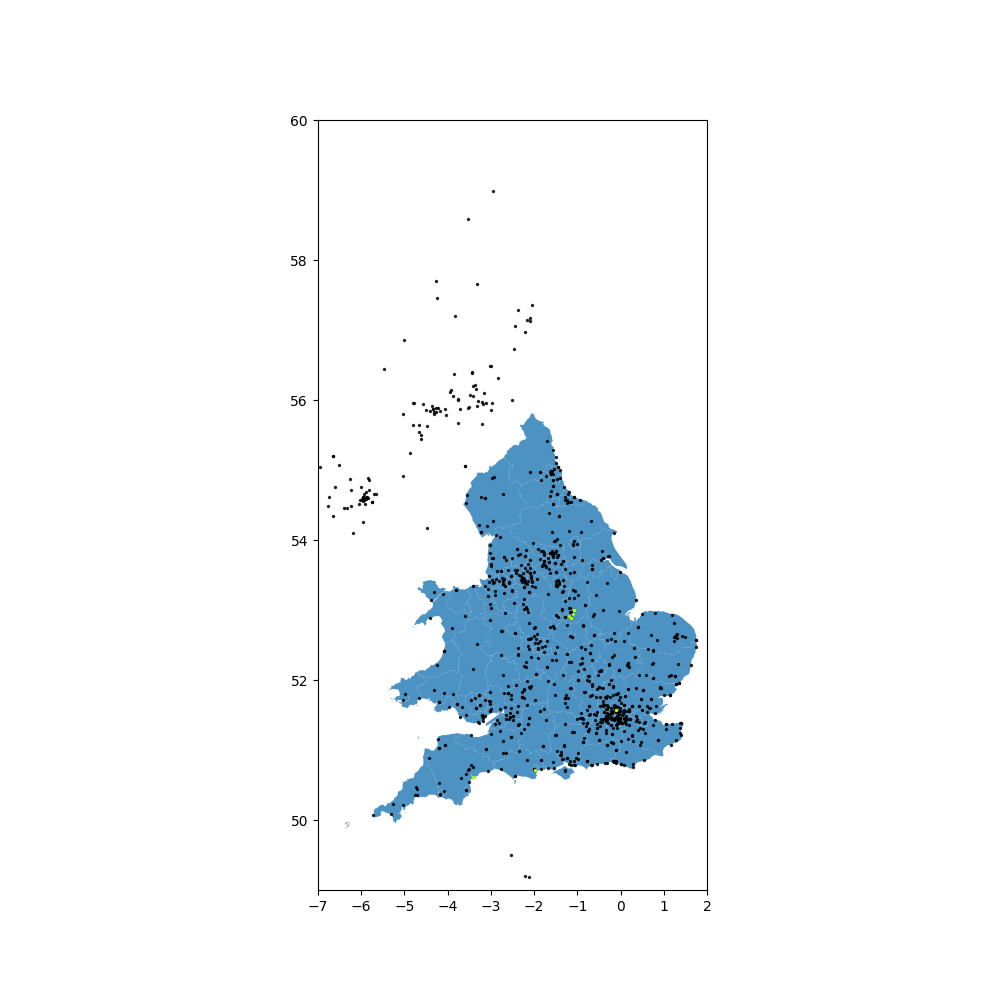

In [27]:
%matplotlib widget

import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
uk.plot(ax=ax, alpha=0.8)

def onclick(event):
    ax = plt.gca()
    ax.texts.clear()  # This clears the text box each time a new click is done
    # ax.set_title(f"You selected {event.x}, {event.y}")
    line = event.artist
    ind = event.ind
    x = gdf.iloc[event.ind[0]]['longitude']
    y = gdf.iloc[event.ind[0]]['latitude']
    parkrun_name = gdf.iloc[event.ind[0]]['parkrun_name']
    last_run_date = gdf.iloc[event.ind[0]]['Run Date']
    time = gdf.iloc[event.ind[0]]['Time']
    tx = f"x={x}, y={y}, parkrun={parkrun_name}, ind={ind},\nline={line}"
    
    ax.set_title(f"{tx}")
    
    # Text box
    box_text = "\n".join(
        (
            f"Parkrun: {parkrun_name}",
            f"Last Run Date: {last_run_date}",
            f"Time: {time}",
        )
    )

    ax.text(-6.5, 59, box_text, bbox={'facecolor': 'blue', 'alpha': 0.5,
                                      'pad': 5})
    

gdf.plot(ax=ax, color='black', marker='.', markersize=8, alpha=0.8, picker=3)
#gdf[gdf['Run Date'].isna()].plot(ax=ax, color='black', marker='.', markersize=8, alpha=0.2, picker=20)
gdf[gdf['Run Date'].notna()].plot(ax=ax, color='#AAFF00', marker='.', markersize=8)

ax.set_xlim(-7,2)
ax.set_ylim(49,60)

cid = fig.canvas.mpl_connect('pick_event', onclick)

# Interactive Picking

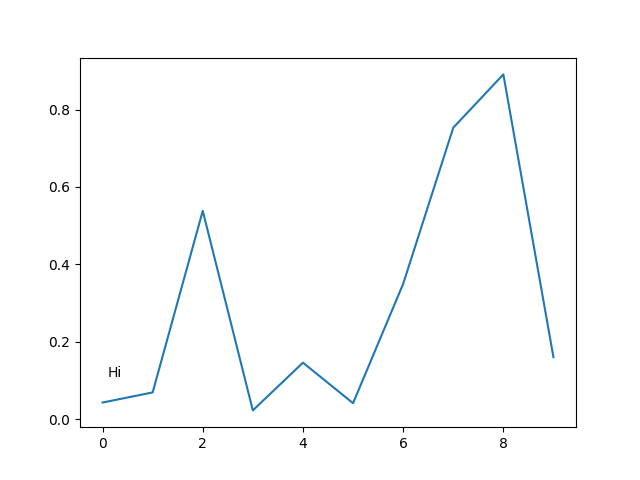

In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0.1,0.1, "Hi", va="bottom", ha="left")



def onclick(event):
    ax = plt.gca()
    ax.set_title(f"You selected {event.x}, {event.y}")
    
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    
    
    
    text.set_text('Hello')

cid = fig.canvas.mpl_connect('button_press_event', onclick)